In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
import glob
import os

warnings.filterwarnings('ignore')


In [2]:
file_dir = r'C:\Users\barry\Desktop\ML_ASS\Mini-1\Data'
files = glob.glob(os.path.join(file_dir, "*.csv"))

In [3]:
df = pd.DataFrame()
for f in files:
    df_temp = pd.read_csv(f)
    df = pd.concat([df, df_temp], ignore_index=True)

In [4]:
df.shape

(72236, 7)

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-01-07,1.8750,1.8750,1.7500,1.7500,0.042099,2000.0
1,2002-01-30,1.6875,1.6875,1.6875,1.6875,0.040595,400.0
2,2002-02-11,1.6750,2.0000,1.6750,2.0000,0.048113,12000.0
3,2002-02-15,2.0000,2.0375,2.0000,2.0000,0.048113,2400.0
4,2002-02-18,1.6875,1.6875,1.6875,1.6875,0.040595,2000.0


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,72236,72219.000000,72219.000000,72219.000000,72219.000000,72219.000000,7.221900e+04
mean,2013-10-13 06:57:07.963896320,116.510240,118.764078,114.198509,116.208711,111.681700,2.220457e+05
min,2000-01-03 00:00:00,0.050000,0.050000,0.010000,0.050000,-0.967747,0.000000e+00
25%,2010-07-05 00:00:00,3.254550,3.358295,3.150000,3.250000,2.500000,2.000000e+02
50%,2014-08-25 00:00:00,16.500000,16.950001,16.100000,16.500000,16.040165,7.000000e+03
75%,2017-08-04 00:00:00,68.019997,70.000000,66.619999,68.099998,63.882132,5.754000e+04
max,2020-06-05 00:00:00,1858.849976,1980.000000,1783.400024,1821.349976,1814.379639,2.100146e+08
std,NaN,250.180976,254.705381,245.414970,249.428562,242.828652,1.575614e+06


In [8]:
df.isna().sum()

Date          0
Open         17
High         17
Low          17
Close        17
Adj Close    17
Volume       17
dtype: int64

In [9]:
df.dropna(inplace=True)

<Axes: >

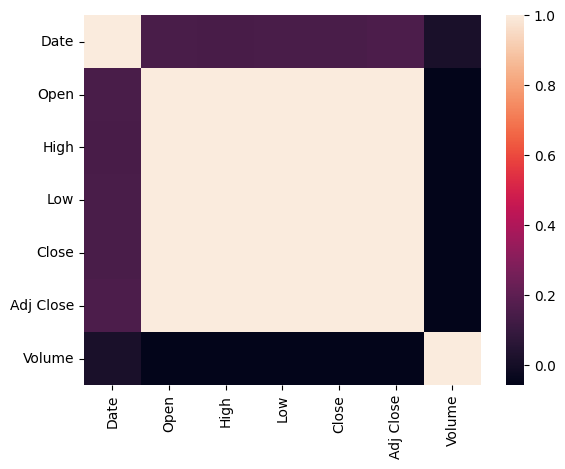

In [10]:
sns.heatmap(df.corr())

In [11]:
y = df['Volume']

In [12]:
ss = StandardScaler()
df = ss.fit_transform(df[['Open','High','Low','Close']])


In [13]:
df= pd.DataFrame(df,columns=['Open','High','Low','Close'])

In [14]:
df

,Open,High,Low,Close
0,-0.458212,-0.458922,-0.458201,-0.458887
1,-0.458962,-0.459658,-0.458455,-0.459137
2,-0.459012,-0.458431,-0.458506,-0.457885
3,-0.457713,-0.458284,-0.457182,-0.457885
4,-0.458962,-0.459658,-0.458455,-0.459137
...,...,...,...,...
72214,-0.463029,-0.463653,-0.462601,-0.463217
72215,-0.463029,-0.463653,-0.462601,-0.463217
72216,-0.463029,-0.463653,-0.462601,-0.463217
72217,-0.463029,-0.463653,-0.462601,-0.463217


In [15]:
x = df

In [16]:
df.shape

(72219, 4)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
xgb = XGBRegressor()


In [20]:
xgb.fit(x_train,y_train)    

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:

xgb_pred = xgb.predict(x_test)



In [23]:

xgb_rmse = np.sqrt(mean_squared_error(y_test,xgb_pred))


xgb_r2 = r2_score(y_test,xgb_pred)


print('XGBoost Regressor RMSE: ',xgb_rmse)

print('XGBoost Regressor R2: ',xgb_r2)

XGBoost Regressor RMSE:  2118685.4731273903
XGBoost Regressor R2:  0.05567482417755698
